<a href="https://colab.research.google.com/github/Poziloi/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)__%D0%A1%D0%BC%D1%8B%D1%81%D0%BB%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [ ]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

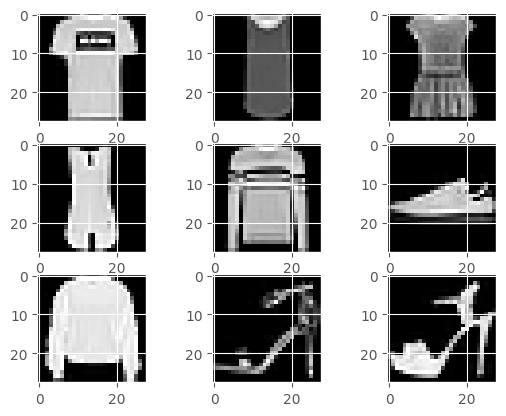

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [ ]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.7746 - loss: 0.6245 - val_accuracy: 0.8740 - val_loss: 0.3493
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.8961 - loss: 0.2904 - val_accuracy: 0.8993 - val_loss: 0.2807
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9091 - loss: 0.2505 - val_accuracy: 0.9038 - val_loss: 0.2579


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

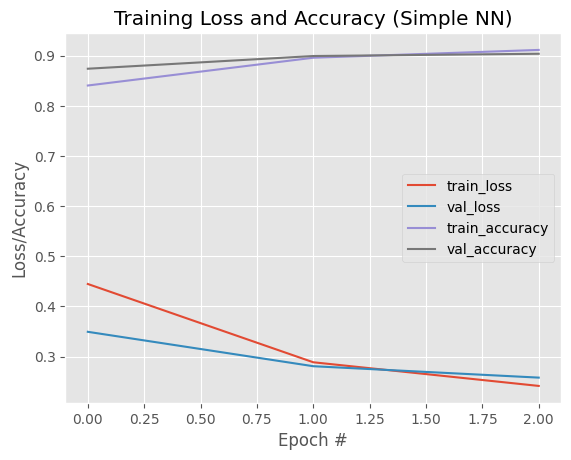

In [ ]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


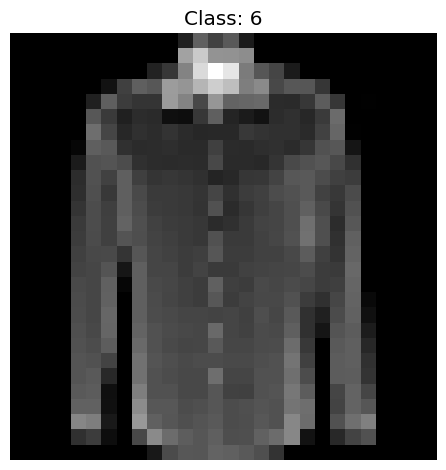

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Class	Prediction
0	0.00223
1	0.00001
2	0.05127
3	0.00053
4	0.06633
5	0.00001
6	0.87944
7	0.00001
8	0.00016
9	0.00002
Result of prediction: 6



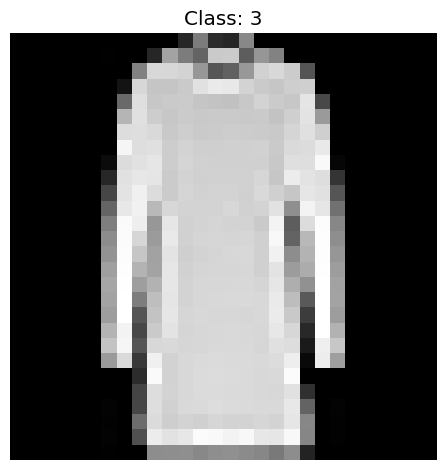

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Class	Prediction
0	0.00045
1	0.00001
2	0.23274
3	0.41709
4	0.34716
5	0.00000
6	0.00177
7	0.00001
8	0.00077
9	0.00000
Result of prediction: 3



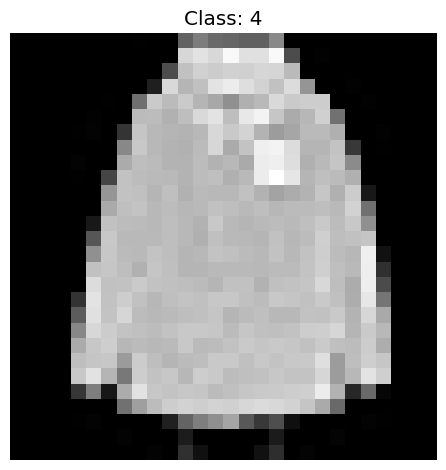

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Class	Prediction
0	0.00025
1	0.00001
2	0.02600
3	0.00037
4	0.96794
5	0.00000
6	0.00476
7	0.00001
8	0.00064
9	0.00002
Result of prediction: 4



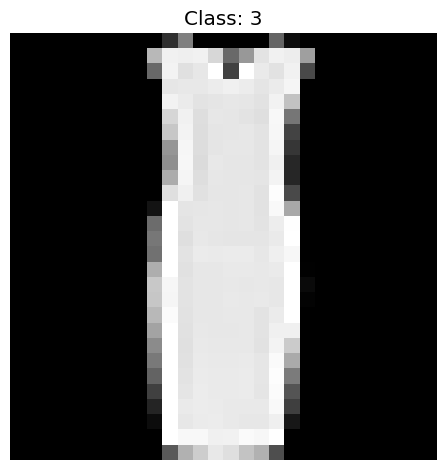

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Class	Prediction
0	0.00016
1	0.00032
2	0.00022
3	0.99916
4	0.00002
5	0.00000
6	0.00012
7	0.00000
8	0.00000
9	0.00001
Result of prediction: 3



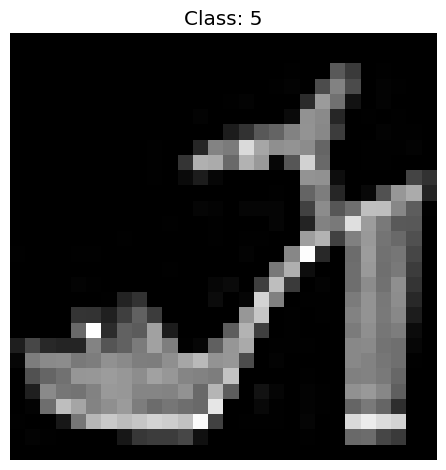

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	1.00000
6	0.00000
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 5



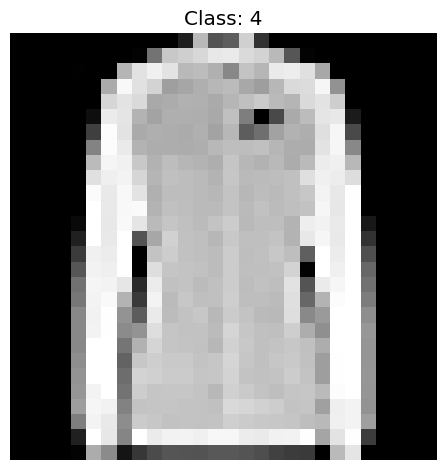

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Class	Prediction
0	0.00089
1	0.00000
2	0.75025
3	0.00090
4	0.04996
5	0.00000
6	0.19796
7	0.00000
8	0.00004
9	0.00000
Result of prediction: 2



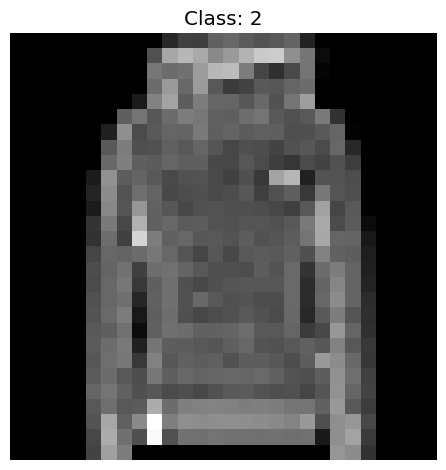

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Class	Prediction
0	0.00036
1	0.00003
2	0.95624
3	0.00016
4	0.04236
5	0.00000
6	0.00080
7	0.00000
8	0.00003
9	0.00001
Result of prediction: 2



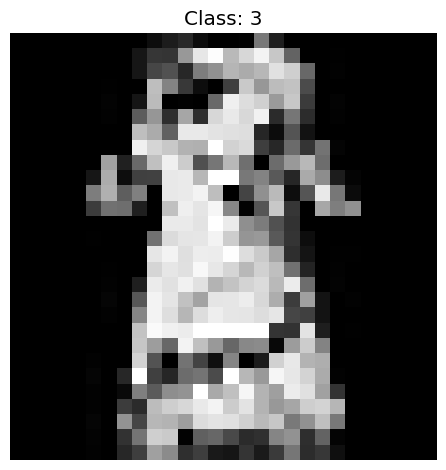

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Class	Prediction
0	0.01875
1	0.00000
2	0.00081
3	0.95809
4	0.00093
5	0.00000
6	0.01831
7	0.00000
8	0.00311
9	0.00000
Result of prediction: 3



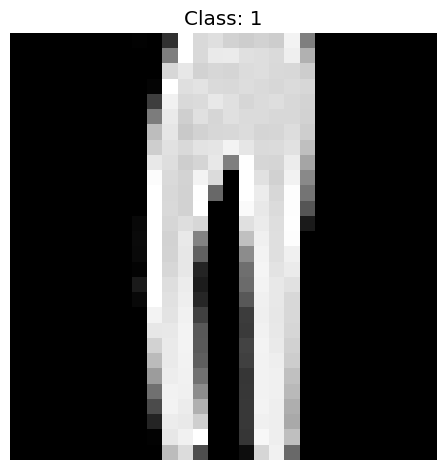

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Class	Prediction
0	0.00000
1	1.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 1



In [ ]:
def predict_fashion(image, model_path = 'model_fashion.keras', labels_path = 'labels_fashion'):
  model = load_model(model_path)
  lb = pickle.loads(open(labels_path, 'rb').read())

  img = image.reshape(-1, 28, 28, 1)

  preds = model.predict(img)
  preds = preds[0]
  print('Class\tPrediction')
  for i in range(len(preds)):
    print(f'{lb.classes_[i]}\t{preds[i]:.5f}')
  print(f'Result of prediction: {preds.argmax()}\n')

# Ваш код
num = np.random.randint(0, 9999, size=10)

for i in range(1, 10):
    plt.plot()
    plt.title(f'Class: {test_Y[num[i]].argmax()}')
    plt.imshow(testX[num[i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_fashion(test_X[num[i]])


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [2]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%capture
!unzip animals.zip -d animals

In [5]:
imagesPath = sorted(list(paths.list_images('/content/animals/')))
random.shuffle(imagesPath)

In [6]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [7]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(7200, 64, 64, 3)
(6480, 64, 64, 3)
(720, 64, 64, 3)


In [8]:
# Ваш код
model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4,  activation='softmax')
])

model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,188 (8.08 MB)

 Trainable params: 2,117,188 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
EPOCH = 20

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 370ms/step - accuracy: 0.3191 - loss: 1.4504 - val_accuracy: 0.5563 - val_loss: 1.0853
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.5712 - loss: 1.0338 - val_accuracy: 0.5910 - val_loss: 0.9648
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.6674 - loss: 0.8370 - val_accuracy: 0.6559 - val_loss: 0.8510
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 60s 516ms/step - accuracy: 0.7271 - loss: 0.7162 - val_accuracy: 0.6790 - val_loss: 0.8290
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 69s 392ms/step - accuracy: 0.7881 - loss: 0.5541 - val_accuracy: 0.6937 - val_loss: 0.8084
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 419ms/step - accuracy: 0.8534 - loss: 0.4192 - val_accuracy: 0.6914 - val_loss: 0.8920
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 75s 349ms/step - accuracy: 0.9070 - loss: 0.2871 - val_accuracy: 0.6921 - val_loss: 0.9234
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 382ms/step - accuracy: 0.9522 - loss: 0

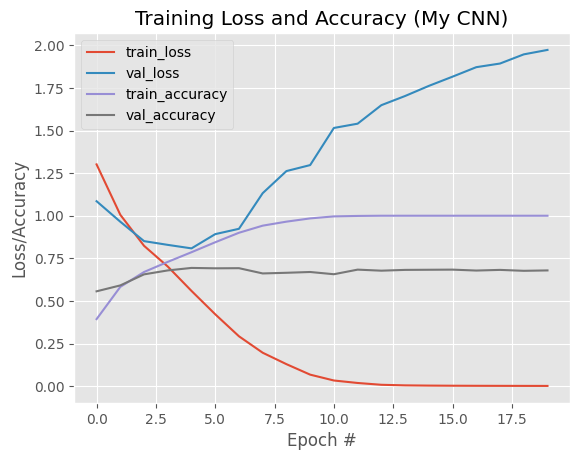

In [10]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [11]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4,  activation='softmax')
])

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.3049 - loss: 1.4368 - val_accuracy: 0.5363 - val_loss: 1.0618
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.5944 - loss: 0.9770 - val_accuracy: 0.6304 - val_loss: 0.9075
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 363ms/step - accuracy: 0.6658 - loss: 0.8340 - val_accuracy: 0.6597 - val_loss: 0.8478
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.7413 - loss: 0.6586 - val_accuracy: 0.6698 - val_loss: 0.8288
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.7998 - loss: 0.5330 - val_accuracy: 0.6674 - val_loss: 0.8664
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 39s 345ms/step - accuracy: 0.8498 - loss: 0.4213 - val_accuracy: 0.6813 - val_loss: 0.8924
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - accuracy: 0.8869 - loss: 0.3187 - val_accuracy: 0.7014 - val_loss: 0.8689
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 338ms/step - accuracy: 0.9269 - loss: 0

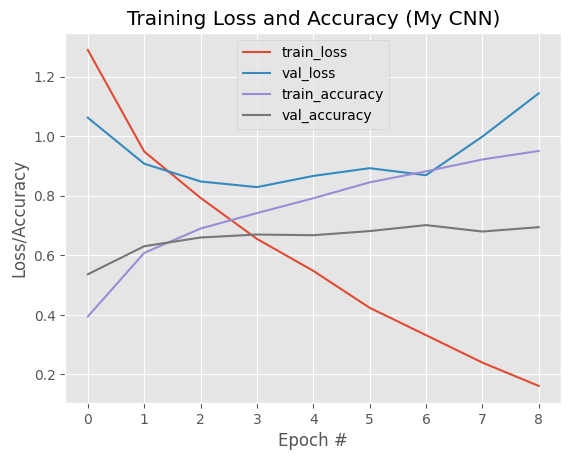

In [14]:
N = np.arange(0, 9)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [15]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,336,228 (5.10 MB)

 Trainable params: 1,336,228 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.3291 - loss: 1.3376 - val_accuracy: 0.3974 - val_loss: 1.2574
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.4712 - loss: 1.1650 - val_accuracy: 0.5440 - val_loss: 1.0530
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.5827 - loss: 0.9785 - val_accuracy: 0.5864 - val_loss: 0.9488
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.6349 - loss: 0.8607 - val_accuracy: 0.6528 - val_loss: 0.8432
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7024 - loss: 0.7214 - val_accuracy: 0.6605 - val_loss: 0.8516
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.7504 - loss: 0.6084 - val_accuracy: 0.6775 - val_loss: 0.8169
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8058 - loss: 0.4836 - val_accuracy: 0.7215 - val_loss: 0.7699
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8523 - loss: 0.3837 - val_accu

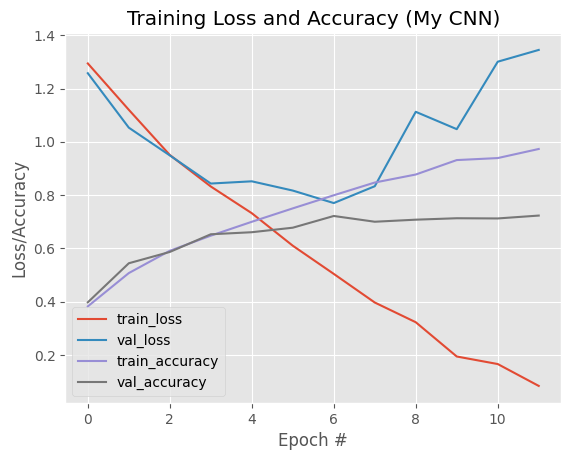

In [18]:
N = np.arange(0, 12)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы


In [22]:
# Ваш код
from keras.models import load_model

model_old = load_model('/content/best_model.h5')


## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

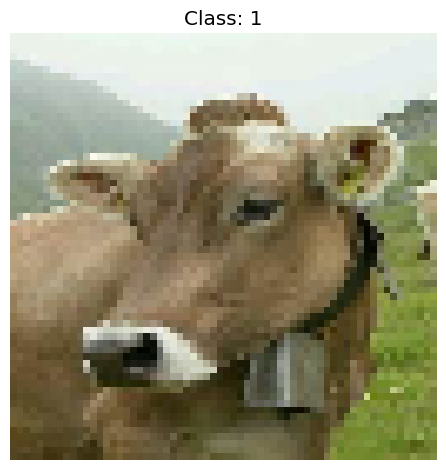

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.04284		0.00486		0.00002
cow	0.46587		0.48448		0.74883
horse	0.10206		0.00561		0.15613
sheep	0.38922		0.50506		0.09503
Result:	1		3		3



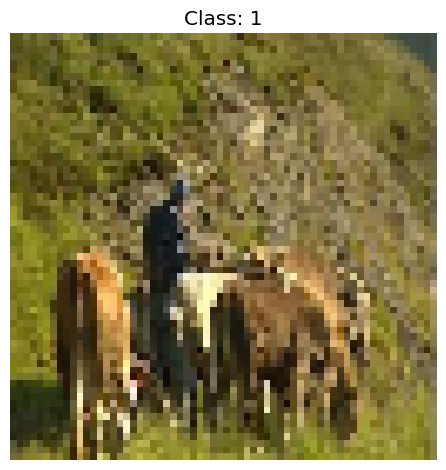

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.18392		0.00068		0.00000
cow	0.25535		0.10173		0.00617
horse	0.09007		0.04562		0.00005
sheep	0.47066		0.85197		0.99378
Result:	3		3		3



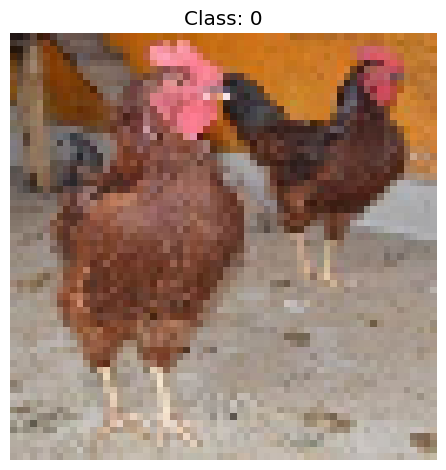

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.88144		0.64764		1.00000
cow	0.03100		0.10315		0.00000
horse	0.04051		0.15413		0.00000
sheep	0.04705		0.09508		0.00000
Result:	0		0		0



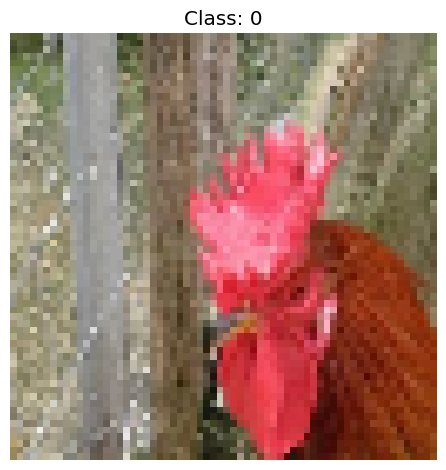

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.69095		0.98573		0.99948
cow	0.09246		0.00286		0.00000
horse	0.11742		0.00578		0.00052
sheep	0.09917		0.00563		0.00000
Result:	0		0		0



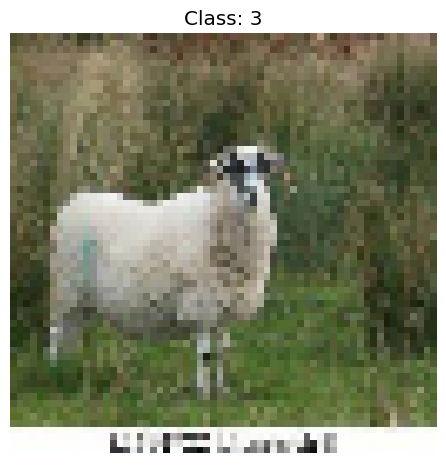

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.16347		0.01294		0.00000
cow	0.30469		0.34872		0.02667
horse	0.12393		0.00188		0.01673
sheep	0.40792		0.63647		0.95660
Result:	3		3		3



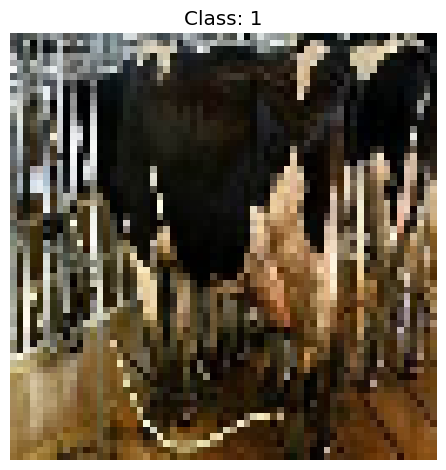

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.06774		0.00019		0.03113
cow	0.39752		0.99456		0.65224
horse	0.36043		0.00019		0.30088
sheep	0.17431		0.00506		0.01576
Result:	1		1		1



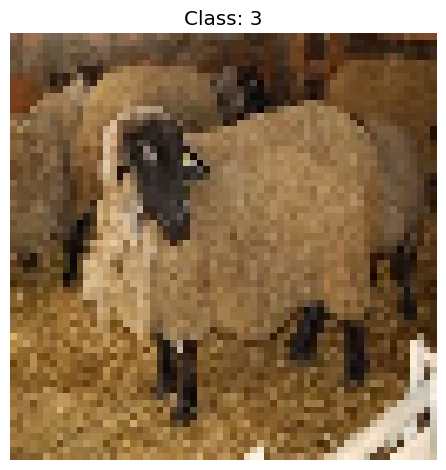

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.13231		0.16844		0.00802
cow	0.33498		0.10803		0.09014
horse	0.32399		0.00920		0.00647
sheep	0.20872		0.71433		0.89537
Result:	1		3		3



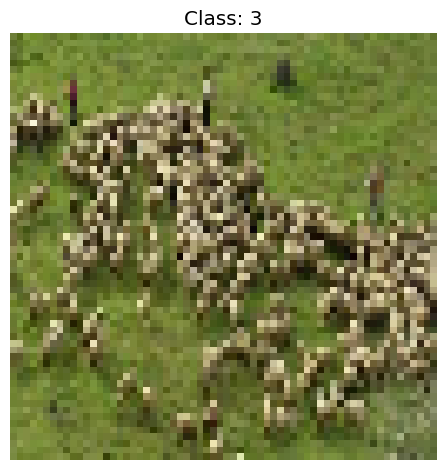

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.15910		0.01993		0.12573
cow	0.25718		0.03112		0.12930
horse	0.07285		0.00859		0.02296
sheep	0.51086		0.94037		0.72201
Result:	3		3		3



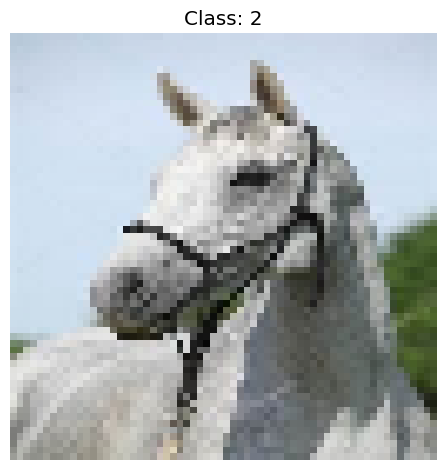

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.37278		0.10407		0.00005
cow	0.20652		0.01737		0.00026
horse	0.27775		0.76363		0.99957
sheep	0.14295		0.11493		0.00011
Result:	0		2		2



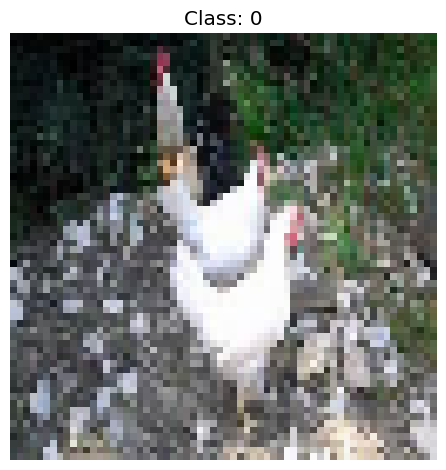

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.32799		0.38245		0.99940
cow	0.20724		0.00444		0.00046
horse	0.27817		0.15439		0.00013
sheep	0.18660		0.45872		0.00001
Result:	0		3		3



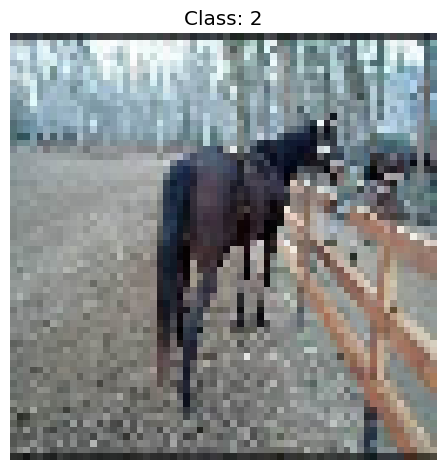

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.23358		0.00976		0.00000
cow	0.26589		0.00355		0.01101
horse	0.30807		0.96585		0.98898
sheep	0.19245		0.02084		0.00001
Result:	2		2		2



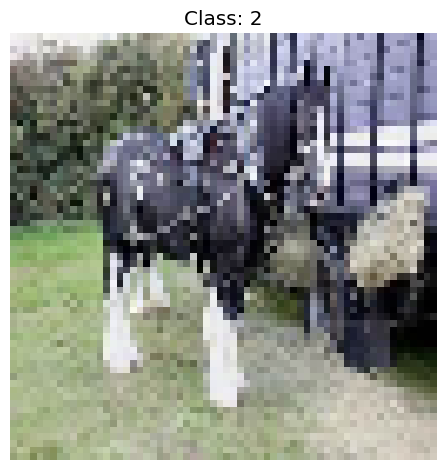

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.01129		0.01992		0.16469
cow	0.25954		0.00334		0.10537
horse	0.68439		0.96043		0.11002
sheep	0.04478		0.01630		0.61992
Result:	2		2		2



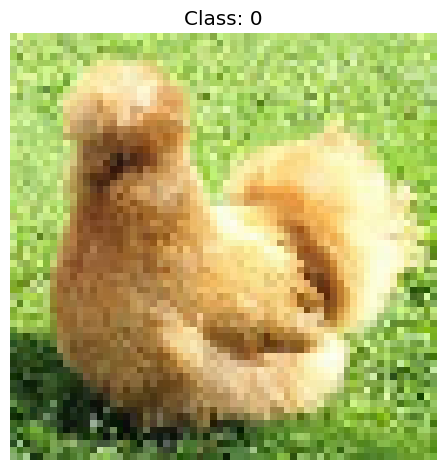

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.34190		0.55792		0.96382
cow	0.09761		0.28103		0.00037
horse	0.04864		0.00112		0.00001
sheep	0.51185		0.15993		0.03580
Result:	3		0		0



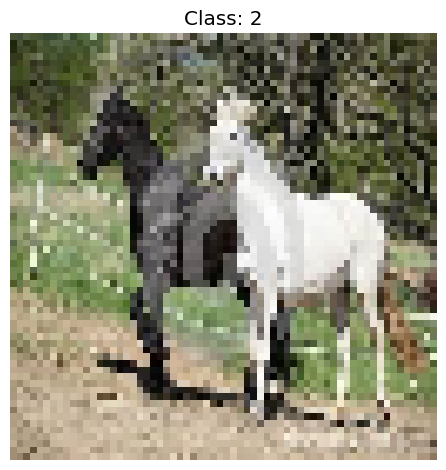

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.05371		0.00021		0.00000
cow	0.35148		0.02104		0.00002
horse	0.46333		0.93890		0.99998
sheep	0.13149		0.03985		0.00000
Result:	2		2		2



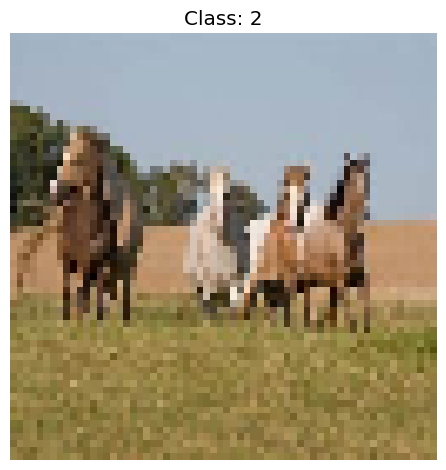

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.01788		0.00257		0.00000
cow	0.56979		0.39717		0.99968
horse	0.19650		0.44379		0.00018
sheep	0.21583		0.15647		0.00014
Result:	1		2		2



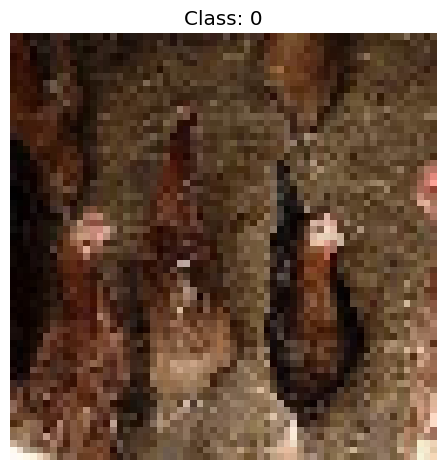

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.12114		0.95078		0.04532
cow	0.28525		0.02091		0.02939
horse	0.45806		0.01712		0.89653
sheep	0.13556		0.01119		0.02876
Result:	2		0		0



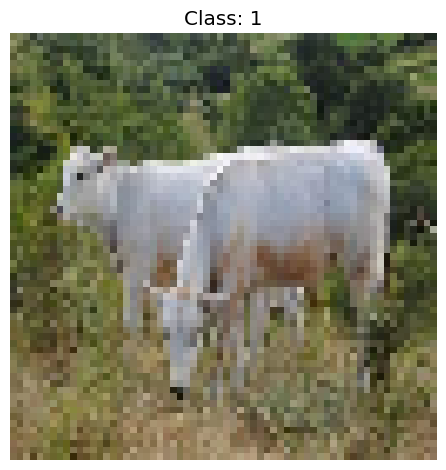

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.06283		0.00044		0.00000
cow	0.40305		0.11360		0.09498
horse	0.36248		0.76839		0.90502
sheep	0.17164		0.11757		0.00000
Result:	1		2		2



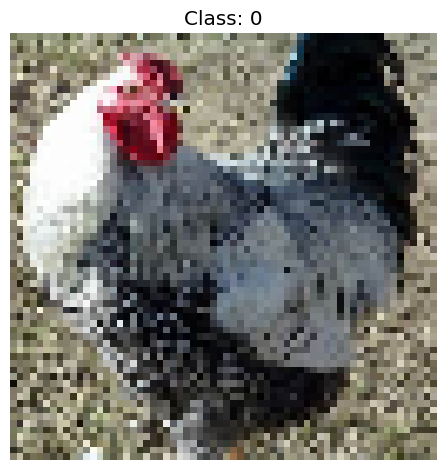

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.79137		0.99286		1.00000
cow	0.05239		0.00005		0.00000
horse	0.06169		0.00090		0.00000
sheep	0.09454		0.00618		0.00000
Result:	0		0		0



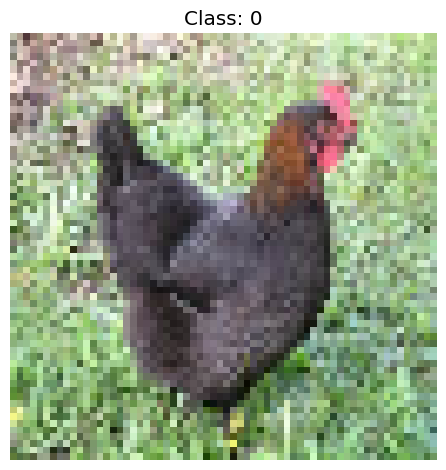

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.81979		0.86632		1.00000
cow	0.03915		0.03576		0.00000
horse	0.03603		0.00434		0.00000
sheep	0.10503		0.09358		0.00000
Result:	0		0		0



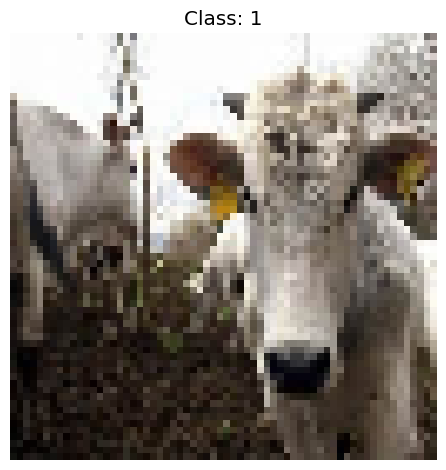

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Class	Old_model	My_model	ResNet_like
chicken	0.21238		0.01887		0.39836
cow	0.22158		0.22646		0.30224
horse	0.10749		0.04443		0.29685
sheep	0.45855		0.71023		0.00254
Result:	3		3		3



In [44]:
# Ваш код
def predict_class(image, labels):
  model_1 = load_model('/content/best_model.h5')
  model_2 = load_model('/content/best_model_my.keras')
  model_3 = load_model('/content/best_model_resnet_like.keras')

  img_flat = image.flatten()
  img_flat = img_flat.reshape((1, img_flat.shape[0]))
  img = image.reshape(-1, 64, 64, 3)

  preds_1 = model_1.predict(img_flat)
  preds_1 = preds_1[0]
  preds_2 = model_2.predict(img)
  preds_2 = preds_2[0]
  preds_3 = model_3.predict(img)
  preds_3 = preds_3[0]
  print('Class\tOld_model\tMy_model\tResNet_like')
  for i in range(len(preds_1)):
    print(f'{labels.classes_[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
  print(f'Result:\t{preds_1.argmax()}\t\t{preds_2.argmax()}\t\t{preds_2.argmax()}\n')

num = np.random.randint(0, 719, size=20)

for i in range(0, 20):
    image_show = X_test[num[i]]
    plt.plot()
    plt.title(f'Class: {Y_test[num[i]].argmax()}')
    plt.imshow(image_show[:, :, ::-1])
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_class(X_test[num[i]], lb)


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [45]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [46]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [47]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

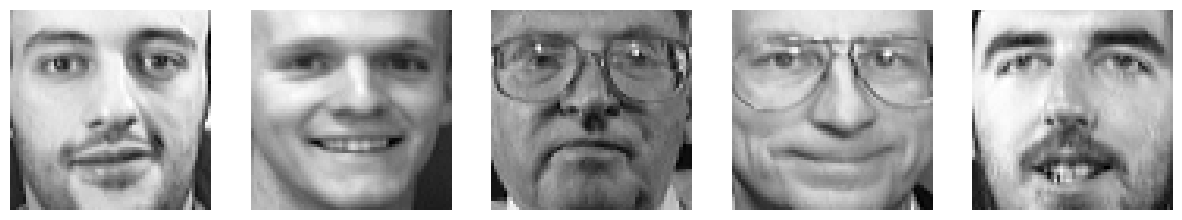

In [48]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [49]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

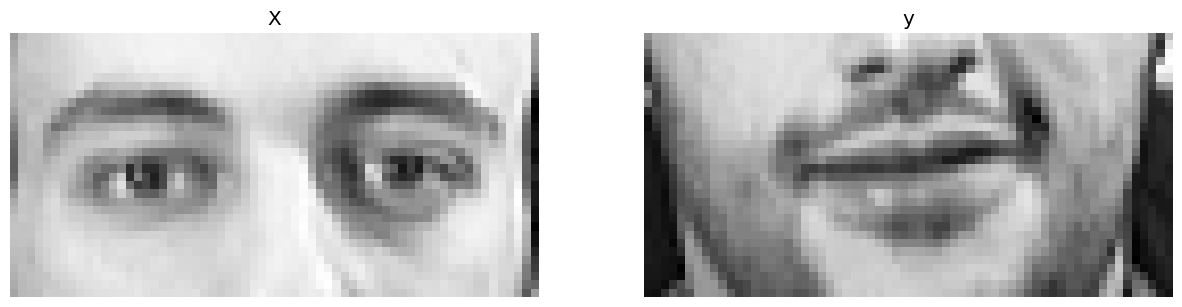

In [50]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [51]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [55]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [56]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [57]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.0000e+00 - loss: 0.0254 - val_accuracy: 0.0000e+00 - val_loss: 0.0225
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 777ms/step - accuracy: 0.0019 - loss: 0.0207 - val_accuracy: 0.0156 - val_loss: 0.0216
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - accuracy: 0.0192 - loss: 0.0206 - val_accuracy: 0.0000e+00 - val_loss: 0.0215
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 744ms/step - accuracy: 8.6806e-04 - loss: 0.0205 - val_accuracy: 0.0000e+00 - val_loss: 0.0217
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 502ms/step - accuracy: 0.0082 - loss: 0.0199 - val_accuracy: 0.0000e+00 - val_loss: 0.0222
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 808ms/step - accuracy: 0.0061 - loss: 0.0204 - val_accuracy: 0.0156 - val_loss: 0.0214
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 474ms/step - accuracy: 0.0099 - loss: 0.0199 - val_accuracy: 0.0000e+00 - val_loss: 0.0211
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 733ms/step - accuracy: 8.6806e-04 - loss: 0

## 3.5. Сделайте предсказания на тестовых данных

In [58]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [59]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.009183898568153381

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [60]:
preds.shape

(80, 2048)

In [61]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

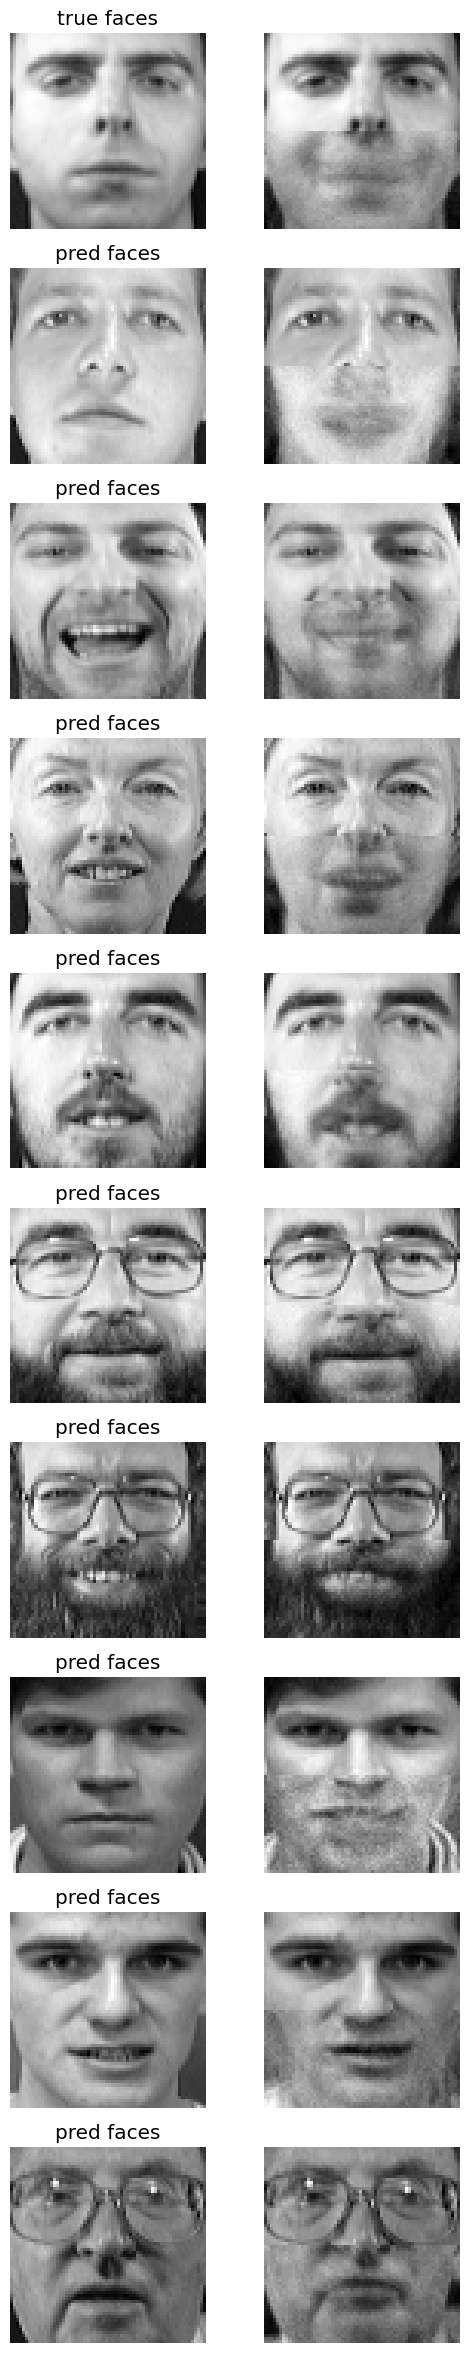

In [63]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )